## What is a Tensor?
A vector generalized to higher dimensions.
Each tensor represents a partially defined computations that will eventually produce a value.
Each tensor has a datatype and a shape.
Datatype is what kind of information that is stored in a tensor.

In [113]:
import tensorflow as tf

string  = tf.Variable("this is a string", tf.string)
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)

The above tensors are scalars,that is tensors with a single value.

## Rank/Degree of Tensors
This is the number of dimensions involved in a tensor
e.g string above is rank 0 (scalar)

In [114]:
rank1_tensor = tf.Variable(["Test","ok","yes"], tf.string)
rank2_tensor = tf.Variable([["test","ok","again"],["test","yes","again"]], tf.string)

To understand 
- rank 0 - can't 'move' along any dimensions
- rank 1 - can 'move' along 1 dimension (e.g along the length of an array)
- rank 2 - can 'move' along 2 dimensions (e.g 2-d array)

To determine the rank of a tensor

In [115]:
tf.rank(number)
# tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

## Shape of Tensors
It tells us how many items we have in each dimension.
Last number is always elements in the list.
e.g (1,2,3) means 1 list the tensor array, 2 lists in the first list and 3 elements in each of those lists.

In [116]:
print(rank1_tensor.shape) #  3 elements in the t
print(rank2_tensor.shape) #2 interior lists in the tensor array with two elements in them

(3,)
(2, 3)


### Changing Shape

In [117]:
tensor1 = tf.ones([1,2,3])
tensor2 = tf.reshape(tensor1, [2,3,1])
tensor3 = tf.reshape(tensor1,[3,-1]) # -1 tells the tensor to calculate the size of that dimension in this case [3,3]
print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


## Types of Tensors

- Variable
- Constant
- Placeholder
- SparseTensor

With the exception fo Variable all other tensors are immutable.

## Evaluating Tensors

Evaluate a tensor by running it in a session. That is, get its value.



In [118]:
# with tf.Session() as sess:
#   tensor.eval()

# TensorFlow Core Learning Algorithms

We'll be looking at 4 fundamental machine learning algorithms in this course.

- Linear Regression
- Classification
- Clustering
- Hidden Markov Models

## Linear Regression
One of the most basic forms of machine learning and is used to predict numeric values. We try to have a linear correspondence between data points.


Note: you may need to restart the kernel to use updated packages.


(0.0, 6.0, 0.0, 20.0)

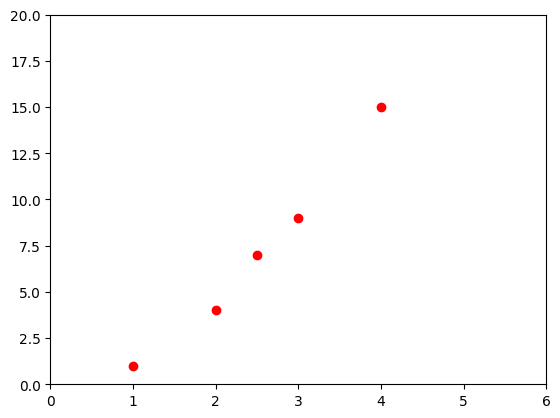

In [119]:
import matplotlib.pyplot as plt

import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
%pip install matplotlib
plt.axis([0, 6, 0, 20]) # type: ignore

We can see that there is a linear correspondence between the data points. When x increases, so does y. Because of this relation we ccan create a line fo bestfit for this dataset. In this example our line will only use one input variable, as we are working in two dimensions. In larger datasets our line will have more features and inputs.

Heres's an example of a line of best fit for this graph.

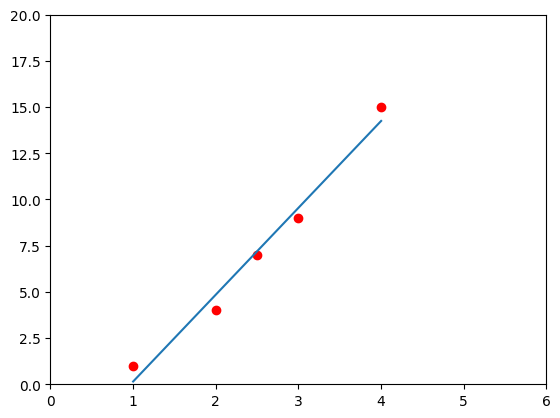

In [120]:
plt.plot(x, y, 'ro')
plt.axis([0, 6.0, 0, 20]) # type: ignore
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

Some setup we need

In [121]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
from IPython.display import clear_output
# from six.moves import urllib

# import tensorflow.compat.v2.feature_column as fc 

## Working with Data

What we're working with is the Titanic Dataset, we will use this to predict the survivability of passengers on the titanic based on certain factors. 


In [122]:
#load dataset
dftrain = pd.read_csv('./data/titanic/train.csv') # training data
dfeval = pd.read_csv('./data/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
dftrain.shape

(627, 9)

Some nice graphs we can  generate

<Axes: >

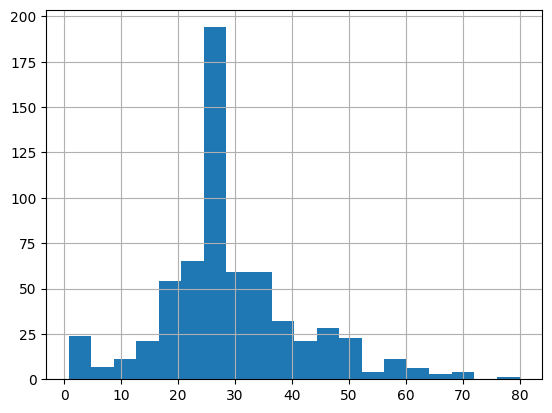

In [123]:
dftrain['age'].hist(bins=20)

<Axes: ylabel='sex'>

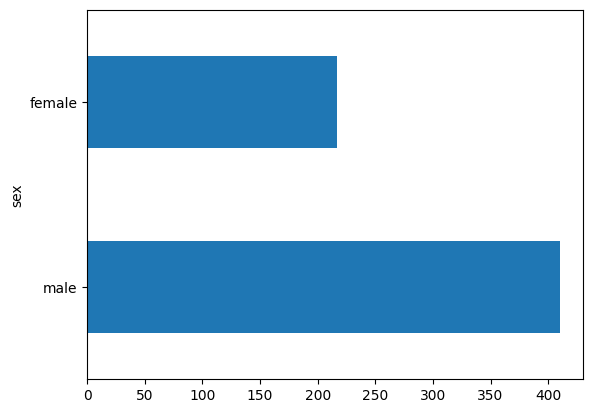

In [124]:
dftrain['sex'].value_counts().plot(kind='barh')

<Axes: ylabel='class'>

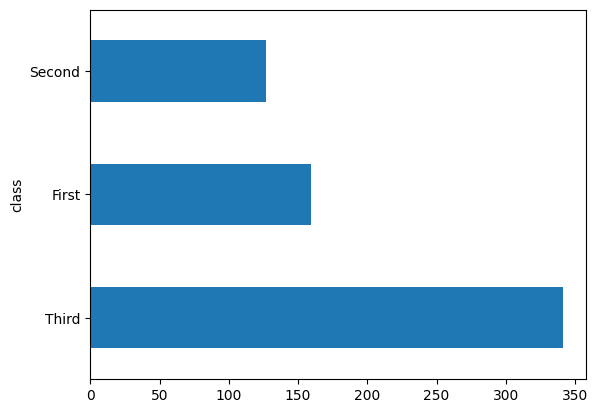

In [125]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

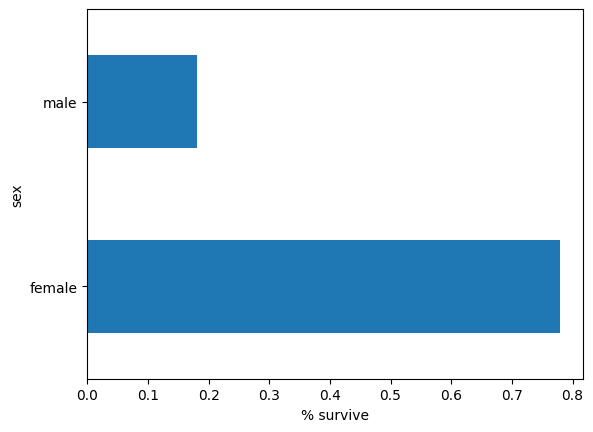

In [126]:
pd.concat([dftrain, y_train], axis=1).groupby(
    'sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

### Training and Testing
Train data is what we feed to the model so it can develop and learn. 
Testing is what we use to evaluate the model. We must use a separate set of data that it has not been trained on.

Categorical Data and Numerical Data
Categorical data is data that is not numeric. But we must transform this data to numbers somehow.

The model we want to train will need to be informed on the features of the input data. (What are the columns? What type of data is contained in the columns?)

In [97]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']

NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  # get list of unique values from feature column
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(
    feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(
    feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

## Training Process
For this specific model data is going to be streamed into in it in small batches of 32. 
~~This is called Stochastic Gradient Descent.~~
An epoch is simply on steam of our entire dataset. The number of epocchs we define is the amount of thimes our model is going to see our entire dataset. We use multiple epochs in the hope that after seeing the same data multiple times our model will be able to learn better how to estimate it. (we feed it again and again in a different order?)
Sometimes there is such a thing as overfeeding, it basically memorizes those data points and is terrible at anything else.

So we need to create an input function. This defines how our dataset will be converted into batches at each epoch.

### Input Function
The model we are going to ue requires that the data we pass into it comes in as a tf.data.Dataset object. This means we must create a input function that can convert our current data into that object.
Below is an input untility function that will convert our current pandas dataframe into a tf.data.Dataset object for us.

In [98]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  
  def input_function():  # inner function that will be returned
    # create tf.data.Dataset object with data and its labels
    # labels are is the data the model is to predict
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    
    ds = ds.batch(batch_size).repeat(num_epochs)

    return ds  # return a batch of the dataset

  return input_function


train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

# create a model with the feature columns
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

linear_est.train(train_input_fn)  # train
# get model metrics/stats by testing on testing data
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)  # type: ignore

{'accuracy': 0.75, 'accuracy_baseline': 0.625, 'auc': 0.8263851, 'auc_precision_recall': 0.78812116, 'average_loss': 0.5118619, 'label/mean': 0.375, 'loss': 0.5082147, 'precision': 0.6386555, 'prediction/mean': 0.46590388, 'recall': 0.7676768, 'global_step': 200}


## How to use the model
TensorFlow models are better at making predictions on large points of data not just one. But we'll do it anyway, just to learn

In [99]:
#labels are ignored during prediction
result = list(linear_est.predict(eval_input_fn))

print(dfeval.loc[4])
print(y_eval.loc[4])
print(result[4]['probabilities'][1])

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\badet\AppData\Local\Temp\tmptsfylnj3\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                          34.0
n_siblings_spouses              0
parch                           0
fare                         13.0
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
1
0.38660544


## Classification
Classification is differentition between data points and seperating them into classes.
The probability that a data point belongs to a class is called its confidence.
We'll be using the Iris Dataset for this example, to classify the species of Iris flowers.

### Dataset
This dataset separates flowers into 3 different classes of species.
- Iris Setosa
- Iris Versicolor
- Iris Virginica

The information about each flower is the following
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

In [109]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train_path = tf.keras.utils.get_file('iris_training.csv', # type: ignore
                                     "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file('iris_test.csv', # type: ignore
                                     "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)




In [101]:
train.head()

,SepalLength,SepalWidth,PetalLength,Species
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
5.7,3.8,1.7,0.3,0


Now we pop off the species column to use as our label

In [ ]:
train_y = train.pop('Species')
test_y = test.pop('Species')

colors = train_y.map({0: 'b', 1: 'r', 2: 'g'})

plt.scatter(train['SepalLength'],train['SepalWidth'],c=colors)
plt.scatter(train['PetalLength'],train['SepalWidth'],c=colors)
plt.show()


We're also going to need a new input function to handle the new data.

In [50]:
def input_fn(features, labels, training=True, batch_size=256):
  # Convert inputs to dataset
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

  if training:
    dataset = dataset.shuffle(1000).repeat()

  return dataset.batch(batch_size)



### Feature Columns

The reason we are not processing this data as much as the one before is becaause it already comes in a numeric format. We just need to convert it to a tf.data.Dataset object.

In [51]:
my_feature_columns = []
for key in train.keys():
  my_feature_columns.append(tf.feature_column.numeric_column(key=key))

print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


### Building the Model
For classification we have a few options. Some are
 - Linear Classifier
 - DNN Classifier (Deep Neural Network)

DNN seems to be the best choice. This is because we may not find a linear relationship between the data points. A DNN can learn more complex relationships between the data points.

In [52]:
# Build a model with 2 hidden layers with 30 and 10 nodes each.

classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # two hidden layers of 30 and 10 respectively
    hidden_units=[30, 10],
    # the model must choose between 3 classes.
    n_classes=3
)

classifier.train(
  input_fn=lambda: input_fn(train, train_y, training=True),
  steps=5000
)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\badet\\AppData\\Local\\Temp\\tmp5czckiii', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorf

In [53]:
eval_result = classifier.evaluate(
  input_fn=lambda: input_fn(test, test_y, training=False)
)

print('\nTetst set accuracy: {accuracy:0.3f}\n'.format(**eval_result)) # type: ignore


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-12-22T10:41:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\badet\AppData\Local\Temp\tmp5czckiii\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.31011s
INFO:tensorflow:Finished evaluation at 2023-12-22-10:41:35
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.8, average_loss = 0.51802975, global_step = 5000, loss = 0.51802975
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\badet\AppData\Local\Temp\tmp5czckiii\model.ckpt-5000

Tetst set accuracy: 0.800



### Making predictions

In [54]:
def input_fn(feature, batch_size=256):
  return tf.data.Dataset.from_tensor_slices(dict(feature)).batch(batch_size)


features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}
print("Please type in numeric values as prompted")

for feature in features:
  valid = True
  while valid:
    val = input(feature + ":")
    if not val.isdigit():
      valid = False

    predict[feature] = [float(val)]
    
predictions = classifier.predict(input_fn=lambda: input_fn(predict))

for pred_dict in predictions:
  print(pred_dict)
  class_id = pred_dict['class_ids'][0]
  probability = pred_dict['probabilities'][class_id]
  print('Prediction is "{0}" ({1:1f}%)'.format(
    SPECIES[class_id], 100 * probability
  ))      


Please type in numeric values as prompted
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\badet\AppData\Local\Temp\tmp5czckiii\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([ 2.9462047,  1.0332872, -2.5155103], dtype=float32), 'probabilities': array([0.86813456, 0.12817918, 0.00368633], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1, 2]), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
Prediction is "Setosa" (86.813456%)


Some exaple input data with expected class to try out our model.

In [55]:
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
  'SepalLength' : [5.1,5.9,6.9],
  'SepalWidth' : [3.3,3.0,3.1],
  'PetalLength': [1.7,4.2,5.4],
  'PetalWidth': [0.5,1.5,2.1]
}

predictions = classifier.predict(input_fn=lambda: input_fn(predict_x))

for pred_dict in predictions:
  class_id = pred_dict['class_ids'][0]
  probability = pred_dict['probabilities'][class_id]
  print('Prediction is "{0}" ({1:1f}%)'.format(
    SPECIES[class_id], 100 * probability
  )) 

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\badet\AppData\Local\Temp\tmp5czckiii\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (71.702844%)
Prediction is "Setosa" (86.813444%)
Prediction is "Setosa" (93.510205%)


## Clustering
We use this to find patterns in data when we don't know what we're looking for. We use this to find groups of similar data points and label them. We can then use this to label new data points. 
We put in how many clusters we want and it finds them for us.
(This might be better for the Iris dataset)

### K-Means Clustering
This is the most popular clustering algorithm. It finds clusters of points that are close to each other. The number of clusters is defined by the user. Unfortunately there are issues with TensorFlow's implementation of K-Means. This means we'll have to write the algorithm ourselves.

### Basic K-Means Algorithm
1. Randomly pick K points to place K centroids
2. Assign all of the data points to the centroids by distance. The closest centroid to a point is the one it is assigned to.
3. Average all of the points belonging to each centroid to find the middle of those clusters (center of mass). Place the corresponding centroids into that position.
4. Reassign every point once again to the closest centroid.
5. Repeat steps 3-4 until no point changes which centroid it belongs to.

## Hidden Markov Models
So far we've used algorithmgs that rely on data. However Hidden Markov Models deal with probability distribution.

Say what we want to predict the weather on any given day given the probability of different events occuring. Maybe we know some information about sunny days and cold days. We know if its sunny, there's an 80% chance it'll be sunny the next day. Using this information on the probability of events occuring we can predict the weather for the next 10 days with a markov model.

So how do we know our probabilities? Alot of times you actually do know the probability of an event occuring. But sometimes what happens is that you have a huge dataset and you calculate the probability of an event occuring based on the frequency of it occuring in the dataset. This is called the empirical probability.

Okay, time for more technical lingo.
- **States**: The Hidden Markov Model is a finite set of states, each of which is accociated with a (generally multidimensional) probability distribution. Transitions among the states are governed by a set of probabilities called transition probabilities.

So we have these states in a hidden markov model. For example in the weather model. The states we could are Hot day and cold day. We call them hidden because we never directly observe them. What we look are called observations. And each state has an observation.

- **Observation**: Each state has a particular outcome or observation associated with it based on a probability distribution.
If it is hot outside, Time has a 20% chance of being happy. If it is cold outside, Time has a 50% chance of being happy.
At that state we can observe the probability of something happening as x. 
In our weather example, the observations are the weather conditions. Each state has a particular set of observations associated with it. We can't see the state, but we can see the observations. For example, on a sunny day the probability of being between 5 and 15 degrees is  a probability we can use.

- **Transition**: Each state has a probability of transitioning to a different state. For example, if it is a sunny day, there is a 70% chance it will be sunny the next day and a 20% chance it will be cloudy the next day.

To create a Hidden Markov Model we need to know
- States
- Observation distribution
- Transition distribution

For our purposes we'll assume we have all this information.


Imports and Setup

In [131]:
import tensorflow as tf
import tensorflow_probability as tfp

## Weather Model
We will model a simple weather system and try to predict the temperature on each day given the following information.

1. Cold days are encoded by a 0 and hot days are encoded by a 1.
2. The first day in our sequence has an 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
5. On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day.

Standard can simply be put as the range of expected variance. So if we have a standard deviation of 5, we can expect the temperature to be within 5 degrees of the mean.

In [132]:
tfd = tfp.distributions  # making a shortcut for later on
initial_distribution = tfd.Categorical(probs=[0.8, 0.2])  # refer to point 2
transition_distribution = tfd.Categorical(probs=[
  [0.7, 0.3],
  [0.2, 0.8]  # refer to points 3 and 4 above
])

observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.]) # refer to point 5

model = tfd.HiddenMarkovModel(
  initial_distribution = initial_distribution,
  transition_distribution=transition_distribution,
  observation_distribution=observation_distribution,
  num_steps=7 #how many times we'll step through this probability cycle
)

The number of steps represents the number of days we want to predict the weather for. In this case we'll do 7 days.
To get the expected temperature for each day we can do the following

In [133]:
mean = model.mean() 

# due to the way TensorFlow works on a lower level we need to evaluate part of the graph
# from within a session to see the value of this tensor

with tf.compat.v1.Session() as sess:
  print(mean.numpy())

[3.        5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]


# Neural Networks with TensorFlow

## What is a Neural Network?
The aim of a neural network is to provide classification or prediction. 

A neural network is made up of layers.

### Input Layer
This is the first layer that accepts our raw data. Say you had a 28 x 28 image you want to feed in as your input. You would need to have 784 input nodes. Each node represents a pixel in the image. 

### Output Layer
This is the last layer that outputs the result of our neural network. For example, if we were trying to classify an image as a number between 0 and 9, we would have 10 output nodes. Each node would represent a number between 0 and 9. The node with the highest value would be our prediction. 
It is better to have a single output node for each class.

### Hidden Layers
These are the layers in between the input and output layers. They are called hidden layers because we never see their values.
Every hidden layer is connected to another layer with weights. These weights are what the neural network will change during training.

A densely connected layer is a layer in which each node is connected to every node in the previous layer.

### Biases
Biases exist in the previous layer to the layer that it affects. It doesn't take any input information. It is some constant numeric value. Its weights always have a value of 1. THey do not connect with each other. They are added to the network as trainable parameters. You can think of them as Y intercepts.

![diagram of neural network](./images/Screenshot%202023-12-22%20200640.png)

Equation in the right hand of the image is the weighted sum of bias for each node. The bias is added to the weighted sum of the previous layer. This is then passed through an activation function.

### Activation Function
This sort of sets limits on the range of outputs we can get.
here are some common activation functions

- Sigmoid: This activation function is used in binary classification problems. It squashes the output between the range of 0 and 1.
- Tanh: This activation function is used in classification problems. It squashes the output between the range of -1 and 1.
- ReLU: This activation function is used in classification problems. It is the most commonly used activation function. It does not activate all the neurons at the same time. It only activates the neurons that have a positive input. 

The point of activation is to introduce complexity into the model. Without activation, the model would be a simple linear regression model.

### Loss Function
This is a function that measures how good our predictions are. It measures the difference between the predicted value and the actual value. The goal of the neural network is to minimize the loss function. The loss function is also called the cost function.

#### Some common loss functions
- Mean Squared Error: This is the most common loss function for regression problems. It is the sum of the squared difference between the predicted value and the actual value.
- Mean Absolute Error: This is another loss function for regression problems. It is the sum of the absolute difference between the predicted value and the actual value.
- Hinge Loss: This is the loss function used in SVMs (Support Vector Machines). It is used for classification problems. It is the sum of the maximum of 0 and the difference between the predicted value and the actual value.

### Training
- Predictions are made with the randomly initialized weights. We then calculate the loss function by comparing the predicted value with the actual value.
- We calculate the gradient, which is the direction we need to move to miinimize the loss function.
- Then we use back propagation to update the weights of the neural network according to the calculated gradient.

### Optimizers
These are algorithms that minimize the loss function. They implement the back propagation algorithm.

Okay, let's get to the code. (Finally 😁)

In [1]:
import tensorflow as tf
from tensorflow import keras # type: ignore
import numpy as np
import matplotlib.pyplot as plt



### Dataset
We'll be using the MNIST Fashion dataset. It contains 60,000 images for training and 10,000 images for testing. 

In [38]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()
# so it's a collection of 28 x 28 arrays
# where each value represents a pixel in an image in range of  0 - 255
train_images[0]
train_images.shape

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']


Let's look at what these images look like

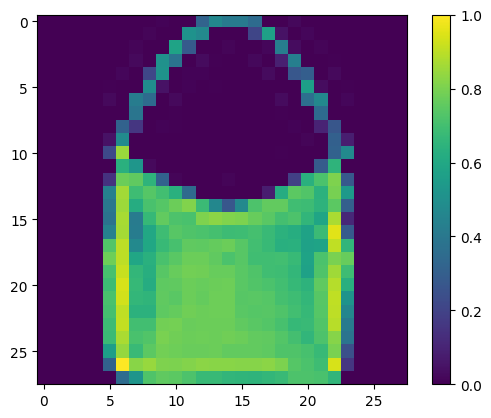

In [70]:
plt.figure()
plt.imshow(test_images[34])
plt.colorbar()
plt.grid(False)

### Data Preprocessing

We need to normalize the data. This means we need to scale the data down to a range of 0 to 1. This is because the input values are between 0 and 255. We can do this by dividing the input values by 255.

It's a good idea to make your numbers as small as possible. This is because the neural starts out with random weights and biases between 0 and 1 unless you change that. If you have large inputs with small weights it'll take way longer to train the model.

In [39]:
train_images = train_images / 255.0
test_images = test_images / 255.0


### Building the model
Now we can build our model. We'll be using a Keras Sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right).

Sequential is the most basic form of neural networks which is just information going from the left side to the right.

**Note**
Careful with epochs. Overfitting is real.

In [53]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)), #input layer (1)
  keras.layers.Dense(128,activation='relu'), #hidden layer (2) arbitrary nubmer of neurons
  keras.layers.Dense(10, activation='softmax') #output layer (3) number ofneuronsis the number of classes
])

model.compile(optimizer='adam', #TODO read up on these 'hyper parameters'
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# print(train_images.shape)
model.fit(train_images,train_labels, epochs=15)


Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4977 - accuracy: 0.8249
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3747 - accuracy: 0.8647
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3365 - accuracy: 0.8770
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3128 - accuracy: 0.8847
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2946 - accuracy: 0.8912
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2796 - accuracy: 0.8964
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2671 - accuracy: 0.9010
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2541 - accuracy: 0.9052
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2460 - accuracy: 0.9079
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.237

In [56]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy: ',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3580 - accuracy: 0.8823
Test accuracy:  0.8823000192642212


1/1 [==============================] - 0s 69ms/step


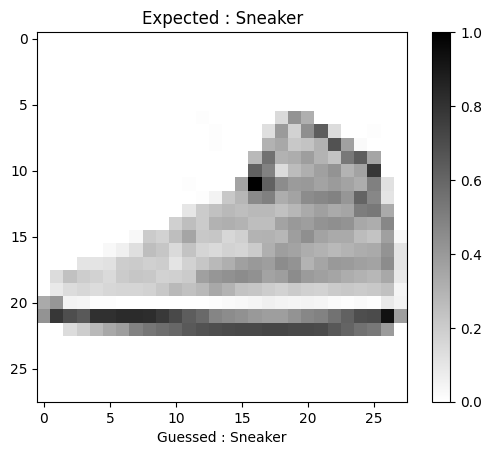

In [83]:
#let's make some predictions 😁
def predict(index):
  predictions = model.predict(np.array([test_images[index]]))
  plt.figure()
  plt.imshow(test_images[index], cmap=plt.cm.binary) # type: ignore
  plt.title(f'Expected : {class_names[test_labels[index]]}')
  plt.xlabel("Guessed : "+class_names[np.argmax(predictions)])
  plt.colorbar()
  plt.grid(False)

predict(45)

## Deep Computer Vision with Convolutional Neural Networks


### Image Data
Previously we used two dimensional data to precess images. Well, that only worked because there were black and white images. Image data is usually made up of three dimensions.

- Height
- Width
- Color Channels

The number of color channels represent the depth of an image and correlates to the colors used in t. For example, a black and white image has a depth of 1 because it only has one color channel. A colored image has a depth of 3 because it has three color channels (red, green, blue). So for each pixel we have three numeric values in the range of 0 to 255.

### What is a Convolutional Neural Network?
The dense network we made previously looked at things globally, and recognized patterns that way. If a certain area of the picture was of a certain brightness, or in a certain pattern it would recognize it. But it would only recognize it if it was in the same place generally, in the image. If we were to say, flip the image around it won't necessarily recognize it.

A convolutional neural network looks at things locally. Instead of recognizing that a certain part of the image should be this way for it to be a shoe, it just learns what a shoe is. 
What a convolutional layer does is look at our image and feef back to us an output feature map that tells what the location of the features are. 
It does this by looking at a small section of the image at a time. This is called a kernel/filter. It then moves the kernel over the image and looks at each section. It then outputs a feature map that tells us where the features are located.

Stride is how many pixels we move the kernel/filter each time we move it. If we have a stride of 1, we move the kernel one pixel at a time. If we have a stride of 2, we move the kernel two pixels at a time.

We can pad an image with a line of pixels to make the output feature map the same size as the input image. This is called same padding. If we don't pad the image, the output feature map will be smaller than the input image.

### Pooling Layers
After all this computation, we're going to have a lot of layers and we need a way t.
A pooling operation is taking specific values from a sample of the output feature map. This is to reduce its dimensionality. 

We sample  the output feature map and take the maximum value from each section. This is called max pooling. We can also take the average value from each section. This is called average pooling.

We have 3 kinds of pooling operation
- min
- max
- average

Let's get to making a model.

We'll using a dataset built into the tensorflow called the CIFAR Image dataset. It contains 60,000 images for training and 10,000 images for testing. The images are 32 x 32 pixels with a depth of 3 (RGB).


The labels are the following
- 0: airplane
- 1: automobile
- 2: bird
- 3: cat
- 4: deer
- 5: dog
- 6: frog
- 7: horse
- 8: ship
- 9: truck

We'll load the dataset and have a look at some of the images.

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images,
                               test_labels) = datasets.cifar10.load_data()

# normalize pixels values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 [==============================] - 646s 4us/step


Text(0.5, 0, 'automobile')

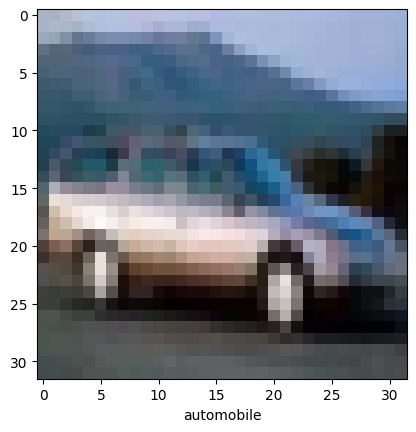

In [5]:
#let's take a look at the images in the dataset
IMG_INDEX = 4
plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])


In [7]:
# building the model

model = models.Sequential()
# we are setting kernel size to 3x3 and number of filters to 64
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [11]:
# all this does is extract the 'features' in the image
# we add a dense network to determine the image class based on the extracted features
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu")) 
model.add(layers.Dense(10)) # output layer for the 10 classes

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

The flatten layer changes the output of our data so we can feed it to the 64 dense node layer followed by the 10 dense node layer (one node for each class).

**NOTE** Relu is Recitified Linear Unit. It is an activation function that is used in neural networks. It is the most commonly used activation function. It does not activate all the neurons at the same time. It only activates the neurons that have a positive input. Basically, if the input is negative, it outputs 0. If the input is positive, it outputs the input.

### Training
We'll train the model for 10 epochs. We'll also use the Adam optimizer. This is a popular optimizer that works well with image data.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images,test_labels))


Epoch 1/10


1563/1563 [==============================] - 30s 18ms/step - loss: 1.5218 - accuracy: 0.4413 - val_loss: 1.2014 - val_accuracy: 0.5715
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1393 - accuracy: 0.5936 - val_loss: 1.0787 - val_accuracy: 0.6203
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9904 - accuracy: 0.6510 - val_loss: 1.0181 - val_accuracy: 0.6466
Epoch 4/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.8870 - accuracy: 0.6877 - val_loss: 0.9524 - val_accuracy: 0.6704
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8146 - accuracy: 0.7139 - val_loss: 0.9453 - val_accuracy: 0.6739
Epoch 6/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7587 - accuracy: 0.7326 - val_loss: 0.9471 - val_accuracy: 0.6811
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7106 - accuracy: 0.7491 - val_loss: 0.870

In [14]:
# we can evaluate the model, we'll probably get the same accuracy since it was already evaluated witht test dataset

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)


313/313 - 2s - loss: 0.9290 - accuracy: 0.7028 - 2s/epoch - 6ms/step


You should get an accruacy of around 70% after 10 epochs. This isn't bad but we'll dive into some better approaches for computer vision below